# Señales $x_j(n)$ para excitar al sistema parlante-habitación-micrófono
En esta notebook se generan diferentes señales que serán utilizadas para excitar al sistema parlante-habitación-micrófono, con el objetivo de medir la respuesta de dicho sistema, y utilizar esa información para aplicar algoritmos de **identificación de sistemas**, mediante los cuales se logrará modelar dicho sistema físico desconocido. Para todos los casos, se utilizará una frecuencia de muestreo $f_s = 48kHz$. Las muestras de sonido tendrá un intervalo de 10 segundos.
* https://www.recordingblogs.com/wiki/sine-sweep

In [22]:
import matplotlib.pyplot as plt

In [24]:
from scipy import signal

In [74]:
from scipy.io.wavfile import write

In [23]:
import numpy as np

In [37]:
import IPython

## Parámetros generales de las señales

In [25]:
# Define the sampling frequency
fs = 48e3

In [42]:
# Define the time interval (seconds)
time_interval = 10
t = np.linspace(0, time_interval, int(time_interval * fs))

## A - Señal de voz
Para modelar el sistema físico desconocido (en este caso la habitación), el filtro adaptativo necesita que exista correlación entre la señal de entrada y la señal deseada, y sólo se podrá adaptar en aquellas frecuencias presentes en ambas. Por ende, en primer lugar es necesario que las señales utilizadas tengan el mayor contenido espectral posible. No se podrá conocer el comportamiento del sistema para aquellas frecuencias en donde no hay contenido espectral en la señal de prueba usada.

## B - Señal de música

## C - Señal rectangular

In [43]:
# Define the square signal frequency
f = 100

# Sampling the square signal
x_square = signal.square(2 * np.pi * f * t)

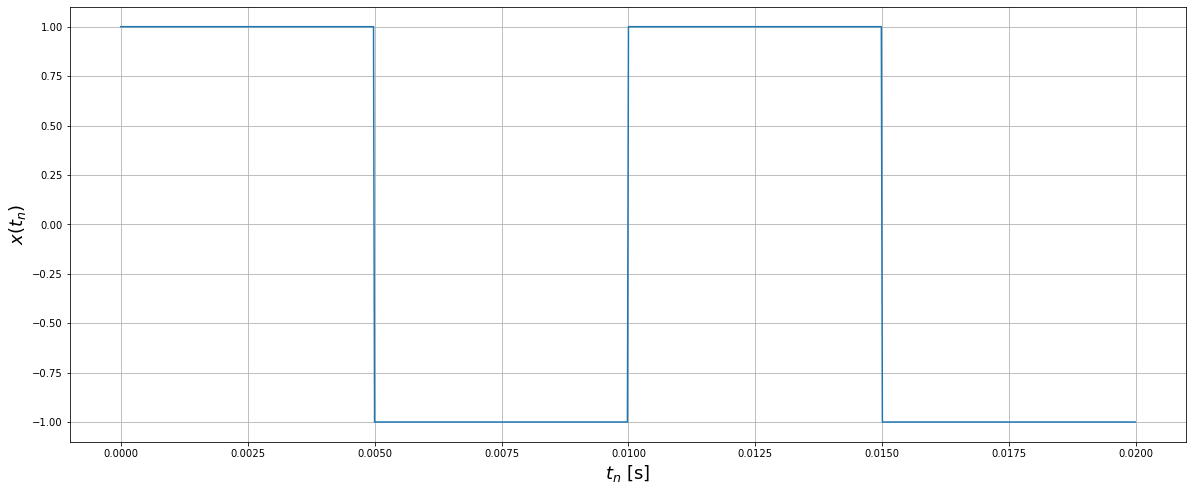

In [48]:
# Plot the signal
plt.figure(figsize=(20, 8))
plt.plot(t[:int(2 * fs / f)], x_square[:int(2 * fs / f)])
plt.xlabel('$t_n$ [s]', fontsize=18)
plt.ylabel('$x(t_n)$', fontsize=18)
plt.grid()
plt.show()

In [75]:
# Download the square signal in the file system
write('../resources/square.wav', int(fs), x_square.astype(np.float32))

In [49]:
# Play the square signal
IPython.display.Audio(x_square, rate=fs)

## D - Barrido lineal de frecuencia

In [77]:
# Define the sweep parameters
f0 = 20
f1 = 20e3

# Sampling the linear sweep signal
x_linear_sweep = np.sin(2 * np.pi * f0 * t + np.pi * ((f1 - f0) / time_interval) * t**2)

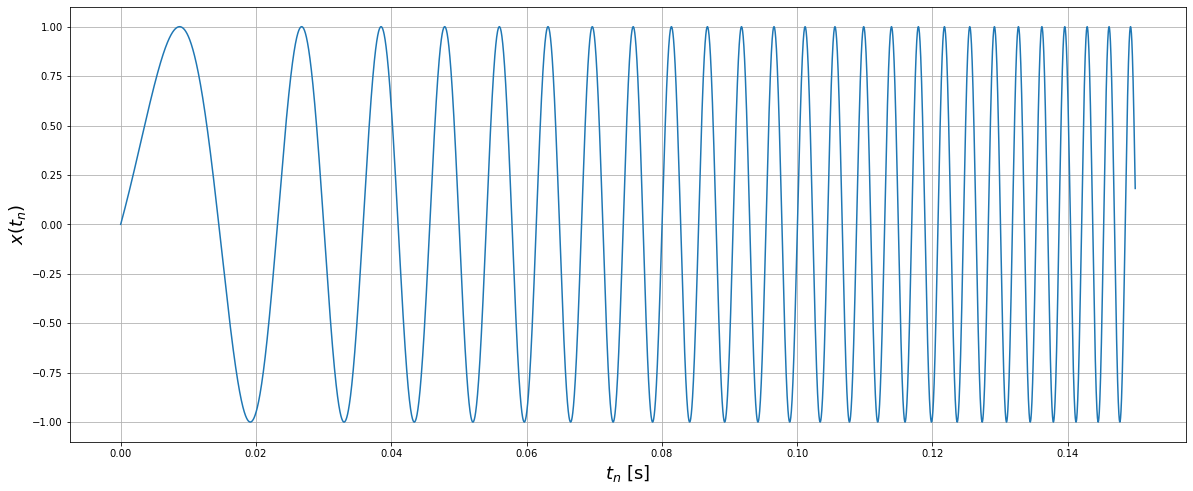

In [78]:
# Plot the signal
plt.figure(figsize=(20, 8))
plt.plot(t[:int(15 * fs / f)], x_linear_sweep[:int(15 * fs / f)])
plt.xlabel('$t_n$ [s]', fontsize=18)
plt.ylabel('$x(t_n)$', fontsize=18)
plt.grid()
plt.show()

In [79]:
# Download the linear sweep signal in the file system
write('../resources/linear_sweep.wav', int(fs), x_linear_sweep.astype(np.float32))

In [58]:
# Play the linear sweep signal
IPython.display.Audio(x_linear_sweep, rate=fs)

## E - Barrido exponencial de frecuencia

In [59]:
# Define the parameters for the exponential sweep
f0 = 20
f1 = 20e3

# Sampling the exponential sweep signal
k = (f1 / f0)**(1 / time_interval)
x_exponential_sweep = np.sin(2 * np.pi * f0 * (k ** t - 1) / np.log(k))

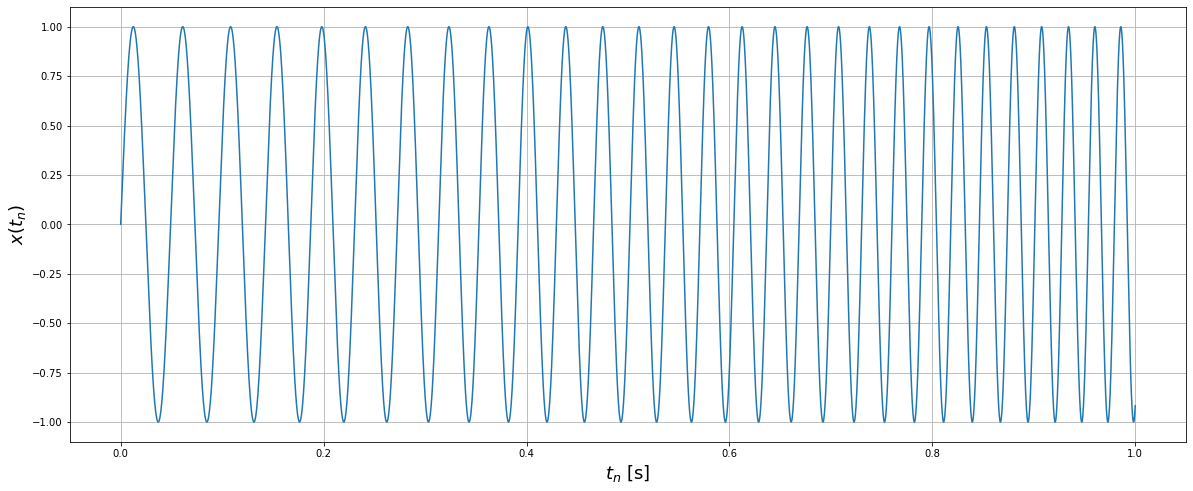

In [63]:
# Plot the signal
plt.figure(figsize=(20, 8))
plt.plot(t[:int(100 * fs / f)], x_exponential_sweep[:int(100 * fs / f)])
plt.xlabel('$t_n$ [s]', fontsize=18)
plt.ylabel('$x(t_n)$', fontsize=18)
plt.grid()
plt.show()

In [80]:
# Download the exponential sweep signal in the file system
write('../resources/exponential_sweep.wav', int(fs), x_exponential_sweep.astype(np.float32))

In [62]:
# Play the exponential sweep signal
IPython.display.Audio(x_exponential_sweep, rate=fs)

## F - Ruido blanco gaussiano

In [64]:
# Define the parameters for the white noise
mu = 0
sigma = 1

# Sampling the white noise
x_noise = np.random.normal(loc=mu, scale=sigma, size=len(t))

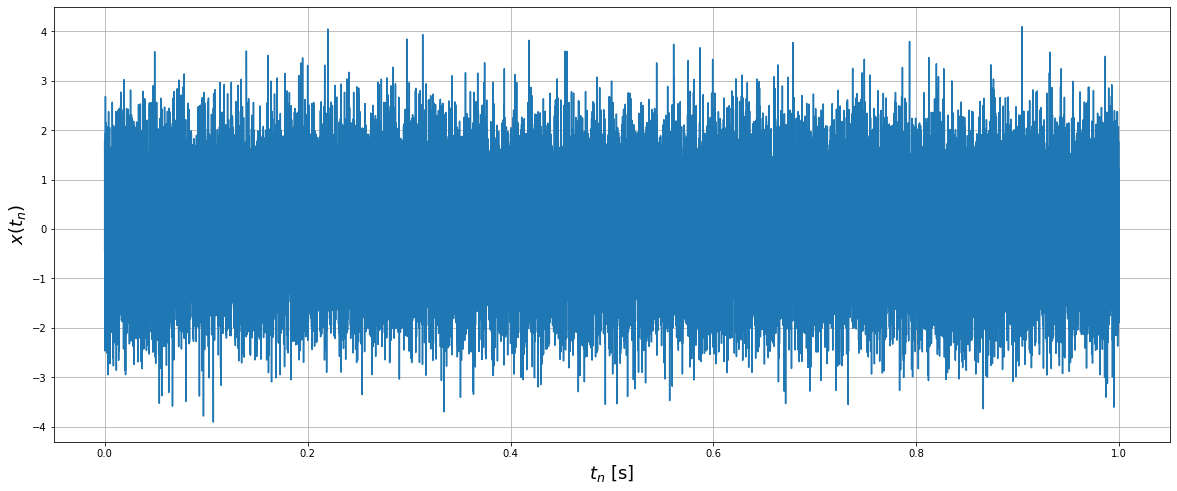

In [65]:
# Plot the signal
plt.figure(figsize=(20, 8))
plt.plot(t[:int(100 * fs / f)], x_noise[:int(100 * fs / f)])
plt.xlabel('$t_n$ [s]', fontsize=18)
plt.ylabel('$x(t_n)$', fontsize=18)
plt.grid()
plt.show()

In [82]:
# Download the white noise signal in the file system
write('../resources/white_noise.wav', int(fs), x_noise.astype(np.float32))

In [66]:
# Play the white noise
IPython.display.Audio(x_noise, rate=fs)